In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from implementation import NeuralNet
np.random.seed(0)

In [2]:
#for input from CSV file.
# data = np.genfromtxt("../data/train.csv", delimiter=",", skip_header=1, dtype=int)
# labels = data[:,0]
# images = data[:,1:]/255

# length = int(len(labels)*.9) #Train on the first 90%. Test on 10%
# training_labels, test_labels = labels[:length], labels[length:]
# training_images, test_images = images[:length], images[length:]

In [3]:
#for input from directly fetching mnist
mnist = fetch_openml('mnist_784', as_frame=False)
labels = mnist.target.astype(int)
images = mnist.data/255

length = 60_000 #Train on 60k, test on 10k
training_labels, test_labels = labels[:length], labels[length:]
training_images, test_images = images[:length], images[length:]

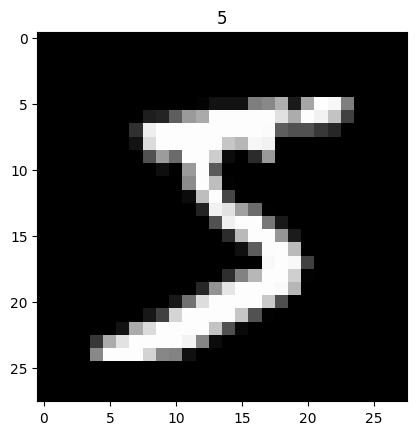

In [4]:
def plot_image(i):
    plt.imshow(images[i,:].reshape(28,28), cmap="gray")
    plt.title(labels[i])
    plt.show()
plot_image(0)

In [5]:
net = NeuralNet([784, 300, 300, 10])
net.evaluate((test_labels, images))

0.1027

In [6]:
%%time
net.train(training_data=(training_labels, training_images), iterations=1, batch_size=10, learning_rate=0.1)
net.evaluate((test_labels, test_images))

CPU times: total: 16.3 s
Wall time: 2min 5s


0.9147

In [18]:
# net.export_csv()
import pandas as pd
print(np.shape(net.biases[0]))
print(np.shape(net.biases[1]))
print(np.shape(net.biases[2]))

print(np.shape(net.weights[0]))
print(np.shape(net.weights[1]))
print(np.shape(net.weights[2]))

def export_csv(net):
    print(net.biases)
    df_biases_a1 = pd.DataFrame(net.biases[0])
    df_biases_a2 = pd.DataFrame(net.biases[1])
    df_biases_o = pd.DataFrame(net.biases[2])
    print(net.weights)
    df_weight_a1 = pd.DataFrame(net.weights[0])
    df_weight_a2 = pd.DataFrame(net.weights[1])
    df_weight_o = pd.DataFrame(net.weights[2])

    df_biases_a1.to_csv('../data/biases_a1.csv', index=False)
    df_biases_a2.to_csv('../data/biases_a2.csv' , index=False)
    df_biases_o.to_csv('../data/biases_o.csv', index=False)

    df_weight_a1.to_csv('../data/weights_a1.csv', index=False)
    df_weight_a2.to_csv('../data/weights_a2.csv', index=False)
    df_weight_o.to_csv('../data/weights_o.csv', index=False)
    return

export_csv(net)

(300,)
(300,)
(10,)
(300, 784)
(300, 300)
(10, 300)
[array([ 1.78442306,  0.44369142,  1.03150665,  2.35613424,  1.83925867,
       -0.74283309,  0.94611919, -0.20985003, -0.24317427,  0.34661312,
        0.25661484,  1.40037387,  0.84557837,  0.01406722,  0.49426352,
        0.48497671,  1.48800516, -0.13639427,  0.05072545, -0.69366849,
       -2.57826531,  0.67825234,  0.826229  , -0.79980565,  2.16637759,
       -1.40205067, -0.0038151 , -0.11757056,  1.60675138,  1.42134438,
        0.00619576,  0.49441043, -0.96412648, -1.96721864, -0.19525382,
        0.41835164,  1.11489666,  1.23471433, -0.49701248, -0.45518371,
       -1.19516743, -1.2091789 , -1.6849262 ,  2.04191817, -0.54877232,
       -0.71492472, -1.19222937,  0.81637607, -1.63798352, -0.0999482 ,
       -1.00030364,  0.34797817, -0.46640016, -1.24155645,  0.03744051,
        0.41342336,  0.03438303,  0.15102659, -0.80706107, -0.21447281,
       -0.85144882, -0.34280285, -0.82889425, -1.65478731,  0.15509541,
       -0.3